# Finales Projekt "Fake News Detection"

* Vorgelegt von: Marc Friz (Matrikelnr), Botan Babath, Nadja Herrmann
* Vorgelegt bei: Dr. Johannes Maucher
* Vorgelegt am: 05.01.2021

### Inhaltsverzeichnis

1. Einleitung / Use Case Scope
2. Datenbeschaffung
3. Analyse welche Pakete benötigt werden
4. Pakete importieren
5. Datenbereitstellung
6. Datenanalyse - Beschreibung der bereitgestellten Datensätze
7. Detaillierte Datenanalyse
8. Zusammenfassung und Ausblick
9. Literaturverzeichnis

### 1. Einleitung
Heutzutage werden Nachrichten über unterschiedliche Medien an die Masse verteilt. Ein Medium ist zum Beispiel die sozialen Medien. Einerseits führen der einfache Zugang und die schnelle Verbreitung von Nachrichten dazu, dass viele Menschen die Nachrichten konsumieren. Auf der anderen Seite aber wird  die schnelle Verbreitung von "Fake Nachrichten" begünstigt. Fake Nachrichten sind Nachrichten von geringer Qualität und mit absichtlich falschen Informationen.  Die weite Verteilung von Fake Nachrichten kann extrem negative Auswirkungen auf Individuen und die Gesellschaft haben (Shu et al, 2017). Daher ist die Erkennung solcher Nachrichten von hoher Relevanz.

#### 1.1 Problemstellung und Ziel der Arbeit

In diesem Projekt werden wir die Hauptprobleme bei der Erkennung von Fehlinformationen analysieren und diskutieren. Wir werden mittels statistischen Methoden unterschiedliche Nachrichten untersuchen. Diese Nachrichten sind bereits in "richtig" und "falsch" kategorisiert. "Richtig" bedeutet, dass die Nachrichten der Wahrheit entsprechen, "falsch" bedeutet das Gegenteil.

Welches Ziel setzen wir uns? Was ist der Scope unserer Projektarbeit?


Quellen:

Kai Shu, Amy Sliva, Suhang Wang, Jiliang Tang and Huan Liu (2017).
Fake News Detection on Social Media: A Data Mining Perspective.
https://dl.acm.org/doi/10.1145/3137597.3137600

#### 1.2 Aufbau der Arbeit

Diese Arbeit befasst sich im ersten Teil mit....

### 2. Datenbeschaffung

Wir beziehen uns in unserem Projekt auf Datensätze von Kaggle und Statista. Diese Datensätze enthalten Nachrichten von amerikanischen Nachrichtensendern. Ebenso enthalten die Datensätze Fake Nachrichten. Was beinhalten die Daten und wie sieht die Struktur aus? Die Quellen sind wie folgt.

### 3. Analyse welche Pakete benötigt werden

Welche Pakete werden benötigt um das in Abschnitt X.X definierte Ziel zu erreichen.

- Pandas provides high-performance, easy-to-use data structures and data analysis tools for Python. It's main datastructure is the numpy-array-based dataframe, which is comparable to dataframes in R. Actually, with Pandas Python provides similar functionality as R. The Pandas Website states it as follows: Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R

- NumPy is the fundamental package for scientific calculation in Python. It provides a multi-dimensional datastructure, the numpy-array, and many efficiently implemented functions for numerical calculations. Many other important libraries for scientific calculation and data analysis are based on Numpy.

- Scipy is based on and extends the functionality of numpy with packages for linear algebra, integration, optimisation, signal processing, statistics and much more. Python with Numpy, Scipy and Matplotlib constitutes a comprehensive tool for scientific calculations of all types. This bunch provides functionality comparable with the commercial tool Matlab

- Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and for graphical user interface toolkits.

Visualisation:

- Bokeh is an interactive visualization library for Python that enables beautiful and meaningful visual presentation of data in modern web browsers. With Bokeh, you can quickly and easily create interactive plots, dashboards, and data applications.

### 4. Pakete importieren

In [4]:
import numpy as np
import pandas as pd
import re

from xml.dom import minidom
from os import listdir
from os.path import isfile, join

### 5. Datenbereitstellung
#### 5.1 Nadja

Die extrahierten Daten werden in dem Basis Format in JupyterNotebook geladen.

In [6]:
# news = pd.read_csv("../DataSet/news_dataset.csv", encoding="latin-1")
news

NameError: name 'news' is not defined

In [ ]:
news.shape

In [ ]:
news.columns

#### Umbenennung der Spaltenbezeichnung zur Vereinheitlichung der Basisdaten. 

Zielformat CSV mit Spaltenbezeichnung: Title, text, source, veracity

In [ ]:
dfnews=news.rename(columns={'content':'text','publication':'source','label':'veracity'})
dfnews.head()

Umbenennung der Werte Fake und Real in False und True.

In [ ]:
dfnews.loc[dfnews['veracity']== 'fake','veracity']='false'
dfnews.loc[dfnews['veracity']== 'real','veracity']='true'
dfnews.head()

Erstellung eines DataFrames mit den Spalten Title, Text, Source und Veracity.

In [ ]:
dfnewsfinal=dfnews[['title','text','source','veracity']]
dfnewsfinal.head()

Bereitstellung und Zusammenführung mit den Daten von Botan und Marc.

#### 5.2 Marc

In [ ]:
data_path = '../DataSet/BuzzFeed_Corpus_2016/articles/'

all_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

In [ ]:
def get_xml_tags(path):
    doc = minidom.parse(path)
    # Title
    try:
        title = (doc.getElementsByTagName('title')[0].firstChild.data)
    except:
        title = ''
        
    # Text
    try:
        text = (doc.getElementsByTagName('mainText')[0].firstChild.data)
    except:
        text = ''
        
    # quelle
    try:
        source = (doc.getElementsByTagName('uri')[0].firstChild.data)
    except:
        source = ''
        
    # veracity
    try:
        veracity = (doc.getElementsByTagName('veracity')[0].firstChild.data)
    except:
        veracity = ''
    
    return title, text, source, veracity    

In [ ]:
l_title = []
l_text = []
l_quelle = []
l_veracity = []

for i in all_files:
    title, text, source, veracity = get_xml_tags(data_path + i)
    l_title.append(title)
    l_text.append(text)
    l_quelle.append(source)
    l_veracity.append(veracity)

In [ ]:
df = pd.DataFrame(list(zip(l_title, l_text, l_quelle, l_veracity)), columns =['title', 'text', 'source', 'veracity']) 
df.head()

In [ ]:
def set_veracity(verasity):
    if verasity.find('false') >= 0:
        return 'false'
    elif verasity.find('true') >= 0:
        return 'true'
    else:
        return ''

In [ ]:
df['veracity'] = df['veracity'].apply(set_veracity)
df.head()

#### 5.3 Botan

#### Description

This dataset is from Kaggle. The Owner of the DataSet is Clément Bisaillon

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset/metadata

The dataset contains two types of articles fake and real News. This dataset was collected from real- world sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news articles were collected from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics.

Read more: 

https://www.uvic.ca/engineering/ece/isot/assets/docs/ISOT_Fake_News_Dataset_ReadMe.pdf

In [ ]:
rawData_true= pd.read_csv ("../DataSet/Kaggle/True.csv")
rawData_true.head()

In [ ]:
rawData_true.info()

#### Erweiterung des Dateframes um Spalte "veracitiy" 

In [ ]:
prepData_true= rawData_true
prepData_true["veracity"]= "true"
prepData_true.head()

#### Erweiterung des Dateframes um Spalte "source" 

In [ ]:
prepData_true["source"]= ""
prepData_true= prepData_true[['title','text','source','veracity','subject','date']]

#### Extrahierung der Quellenangabe aus Spalte Text mithilfe von Regex

In [ ]:
match=0
nomatch= 0
rownumber= 0
findrows_nomatch = []
for index, row in prepData_true.iterrows():
    if "(Reuters)" in row.text: # Sucht nach "Reuters" im Text
        if " - " in row.text: # Trennung an der Stelle "-" in Quelle und Text 
            regex = r" - " 
            source = re.split(regex,row.text)[0] # Quelle 
            text = re.split(regex,row.text)[1]  # Text 
            row.source = source 
            row.text = text
            match= match + 1
    else:
        nomatch= nomatch +1 
        findrows_nomatch.append(rownumber)
   
    rownumber= rownumber + 1

#### Extract news only from the Reuters source

In [ ]:
prepData_true_1 = prepData_true.drop(findrows_nomatch)
prepData_true_1 = prepData_true_1.loc[prepData_true_1['subject'] == "politicsNews"]

In [ ]:
prepData_true_1.head()

In [ ]:
rawData_false= pd.read_csv ("../DataSet/Kaggle/Fake.csv")
rawData_false.head()

In [ ]:
prepData_false= rawData_false
prepData_false["veracity"]= "false"
prepData_false.head()

In [ ]:
prepData_false["source"]= ""
prepData_false= prepData_false[['title','text','source','veracity','subject','date']]
prepData_false.head()

#### 5.4 Merge

In [ ]:
dfnewsfinal['set'] = 'nadja'
df['set'] = 'marc'
prepData_true_1['set'] = 'botan'
prepData_false['set'] = 'botan'

In [ ]:
end_df = df.append(dfnewsfinal)
end_df = end_df.append(prepData_true_1)
end_df = end_df.append(prepData_false)
end_df

#### 5.5 Save

In [ ]:
end_df.to_csv('../DataSet/complete_dataset.csv')

### 6. Datenanalyse

Beschreibung der bereitgestellten Datensätze.
Welche Merkmale müssen untersucht werden? Literaturrecherche

### 6.1 Betrachtung n gram

#### 6.1 Datenbereitstellung

Im ersten Schritt stellen wir die bereits zusammengefassten Nachrichten in form eines DataFrames bereit.

In [90]:
newscompletedataset = pd.read_csv("complete_dataset.csv", encoding="latin-1")

In [92]:
print(newscompletedataset.loc[newscompletedataset['veracity'] == 'False'])

Empty DataFrame
Columns: [Unnamed: 0, title, text, source, veracity, set, subject, date]
Index: []


Mit Hilfe der Funktion .head können wir uns einen Überblick über die Daten schaffen.

In [87]:
newscompletedataset.head(200)

,Unnamed: 0,title,text,source,veracity,set,subject,date
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN
...,...,...,...,...,...,...,...,...
195,195,Trump Uninvites Gennifer Flowers To Debate Aft...,Anyone with even a little bit of decency was o...,http://www.ifyouonlynews.com/politics/trump-un...,False,marc,NaN,NaN
196,196,NaN,Itâs night-impossible to spend five minutes ...,http://winningdemocrats.com/this-one-comment-f...,True,marc,NaN,NaN
197,197,Watch TrumpÃ¢ÂÂs Campaign Manager Crash And ...,"Defending Donald Trump is no easy task, but ev...",http://addictinginfo.org/2016/09/26/watch-trum...,True,marc,NaN,NaN
198,198,Networks Confirm They Will Not Be Fact-Checkin...,ThereÃ¢ÂÂs already been hints from NBC News ...,http://addictinginfo.org/2016/09/26/networks-c...,False,marc,NaN,NaN


Notwendige Pakete für NLP:

#natural language processing
import re
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

#add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [49]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nadja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nadja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(''.join(str(newscompletedataset['text'].tolist())))

In [45]:
words

['hillary',
 'clintondonald',
 'trump',
 'debate',
 'upon',
 'u',
 'quadrennial',
 'question',
 'come',
 'begging',
 'showdown',
 'matter',
 'chance',
 'impact',
 'seem',
 'ripe',
 'year',
 'two',
 'unpopular',
 'majorparty',
 'candidate',
 'history',
 'abc',
 'newswashington',
 'post',
 'poll',
 'facing',
 'donald',
 'trump',
 'unorthodox',
 'campaign',
 'style',
 'provocative',
 'position',
 'piqued',
 'public',
 'interest',
 'debate',
 'may',
 'single',
 'best',
 'opportunity',
 'allay',
 'concern',
 'qualification',
 'temperament',
 'policy',
 'promise',
 'alike',
 'hillary',
 'clinton',
 'part',
 'need',
 'ax80x93',
 'like',
 'trump',
 'ax80x93',
 'ease',
 'question',
 'trustworthiness',
 'well',
 'spark',
 'greater',
 'enthusiasm',
 'among',
 'supporter',
 'either',
 'candidate',
 'move',
 'needle',
 'tough',
 'review',
 'data',
 'since',
 '1960',
 'suggests',
 'past',
 'debate',
 'almost',
 'never',
 'directly',
 'measurably',
 'changed',
 'candidate',
 'relative',
 'standing',


In [41]:
words[:20]

['hillary',
 'clintondonald',
 'trump',
 'debate',
 'upon',
 'u',
 'quadrennial',
 'question',
 'come',
 'begging',
 'showdown',
 'matter',
 'chance',
 'impact',
 'seem',
 'ripe',
 'year',
 'two',
 'unpopular',
 'majorparty']

In [47]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(donald, trump)             34699
(united, state)             25359
(hillary, clinton)          21193
(white, house)              19786
(new, york)                 18014
(trump, said)                6997
(secretary, state)           6955
(barack, obama)              6806
(president, obama)           6533
(president, donald)          6490
(image, via)                 6408
(last, week)                 5985
(fox, news)                  5938
(last, year)                 5760
(supreme, court)             5757
(national, security)         5541
(year, ago)                  5231
(presidential, election)     5171
(state, department)          5035
(york, time)                 4947
dtype: int64

In [46]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(president, donald, trump)             4902
(new, york, time)                      4883
(president, barack, obama)             3543
(donald, j, trump)                     3015
(u, president, donald)                 2502
(george, w, bush)                      2353
(new, york, city)                      2134
(black, life, matter)                  1942
(21st, century, wire)                  1922
(j, trump, realdonaldtrump)            1894
(president, united, state)             1885
(fbi, director, james)                 1524
(affordable, care, act)                1429
(director, james, comey)               1410
(president, donald, trumpax80x99s)     1394
(president, vladimir, putin)           1292
(speaker, paul, ryan)                  1235
(republican, presidential, nominee)    1201
(national, security, adviser)          1193
(u, presidential, election)            1142
dtype: int64

In [74]:
twograms=(pd.Series(nltk.ngrams(words,2)).value_counts())[:15]
trigrams=(pd.Series(nltk.ngrams(words,3)).value_counts())[:15]

Text(0.5, 0, 'Häufigkeit')

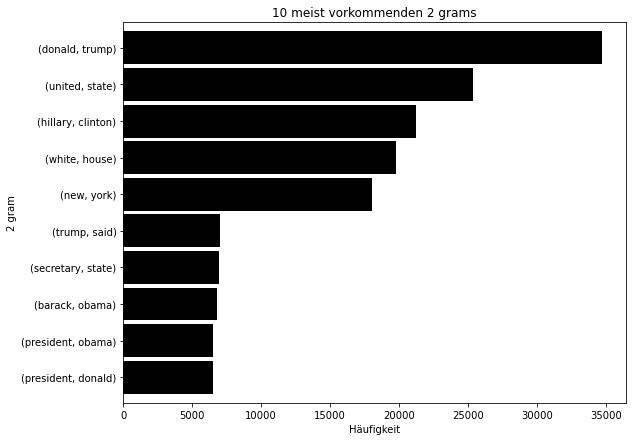

In [73]:
twograms.sort_values().plot.barh(color='black', width=.9, figsize=(9, 7))
plt.title('10 meist vorkommenden 2 grams')
plt.ylabel('2 gram')
plt.xlabel('Häufigkeit')